In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Visualuzación

In [3]:
df_metaData = pd.read_csv("./Data/metaData.csv")

In [5]:
df_metaData[df_metaData["Variable"] == "MTO_PIA"]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de...,Numérico,10,NaN,EJEMPLO: 12345.67


- **Variable:** MTO_PIA
- **Descripción:** Monto asignado de Presupuesto Institucional de Apertura.
- **Tipo de Dato:** Numérico

Eligir columnas que estén directamente relacionadas o que puedan influir en el monto asignado de Presupuesto Institucional (MTO_PIA).

Realizar un análisis de correlación para identificar qué variables están más correlacionadas con MTO_PIA. (Las variables con alta correlación pueden ser buenos predictores).


In [6]:
df = pd.read_csv("./Data/train.csv")
df1 = df.iloc[:, :36]

In [13]:
df1.describe()

,FECHA_CORTE,ANIO_EJEC,SEC_EJEC,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,UBIGEO,MTO_PIA
count,1464.0,1464.0,1464.0,1464.000000,1464.0,1464.000000,1464.0,1464.000000,1464.000000,1464.000000,1.464000e+03
mean,20230201.0,2023.0,1674.0,12.462432,0.0,593.712432,0.0,874.536202,35.180328,126105.652322,4.745334e+04
std,0.0,0.0,0.0,7.395105,0.0,4772.404708,0.0,7136.279030,20.086763,69018.461602,1.844846e+05
min,20230201.0,2023.0,1674.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000,10199.000000,0.000000e+00
25%,20230201.0,2023.0,1674.0,6.000000,0.0,4.000000,0.0,4.000000,16.000000,60199.000000,1.330000e+02
50%,20230201.0,2023.0,1674.0,12.000000,0.0,6.000000,0.0,6.000000,42.000000,140199.000000,2.316500e+03
75%,20230201.0,2023.0,1674.0,18.000000,0.0,16.000000,0.0,16.000000,52.250000,180199.000000,1.742675e+04
max,20230201.0,2023.0,1674.0,27.000000,0.0,40890.000000,0.0,61303.000000,80.000000,250199.000000,2.816373e+06


- Identificar variables relevantes: Al calcular la correlación entre MTO_PIA y las demás variables, identificamos cuáles de ellas están más fuertemente relacionadas con el monto asignado de Presupuesto Institucional (MTO_PIA). Estas variables pueden ser buenos candidatos para incluir en un modelo predictivo o para profundizar en su análisis.

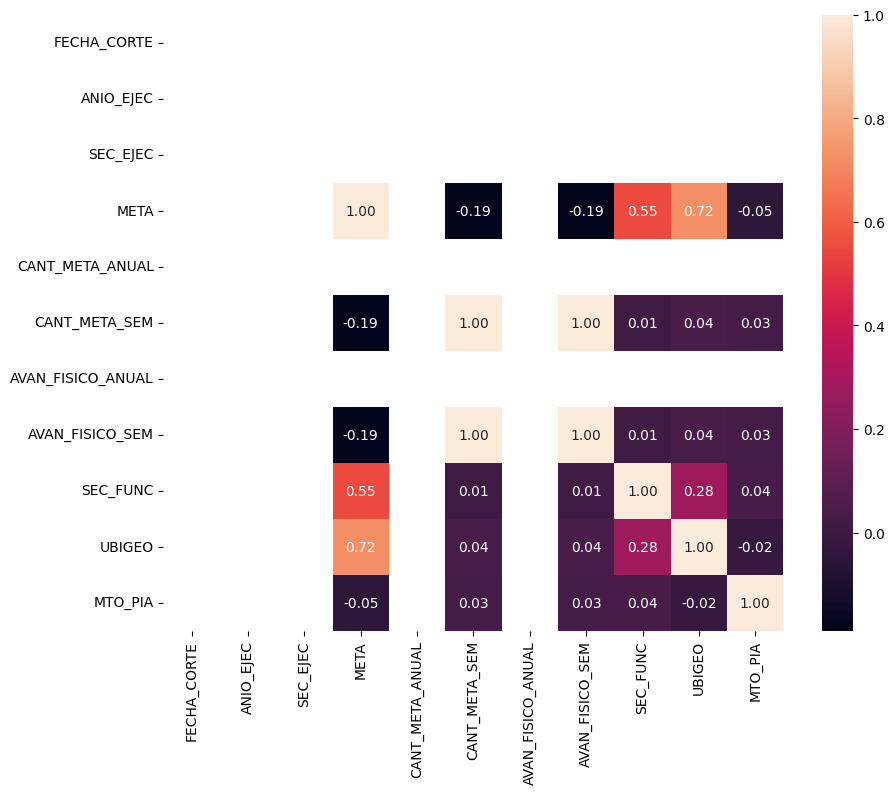

In [11]:
correlacion = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f")
plt.show()

In [16]:
correlacion["MTO_PIA"].dropna()

META              -0.047390
CANT_META_SEM      0.027448
AVAN_FISICO_SEM    0.027541
SEC_FUNC           0.037538
UBIGEO            -0.017282
MTO_PIA            1.000000
Name: MTO_PIA, dtype: float64

**Interpretación de la Correlación con 'MTO_PIA':**

- **META:** Con un coeficiente de correlación de **-0.047390**, indica una correlación negativa muy débil con 'MTO_PIA'. Esto sugiere que no hay una relación lineal fuerte entre 'META' y el monto asignado de Presupuesto Institucional.

- **CANT_META_SEM:** Tiene un coeficiente de **0.027448**, lo que implica una correlación positiva muy débil. Esto significa que a medida que 'CANT_META_SEM' aumenta, 'MTO_PIA' tiende a aumentar ligeramente, pero la relación no es fuerte.

- **AVAN_FISICO_SEM:** Con un coeficiente de **0.027541**, muestra una correlación positiva muy débil similar a 'CANT_META_SEM'. Esto indica que 'AVAN_FISICO_SEM' y 'MTO_PIA' se mueven ligeramente en la misma dirección, pero la relación es débil.

- **SEC_FUNC:** Presenta un coeficiente de **0.037538**, indicando una correlación positiva débil. Esto sugiere que 'SEC_FUNC' podría tener una influencia leve en 'MTO_PIA'.

- **UBIGEO:** Con un coeficiente de **-0.017282**, muestra una correlación negativa muy débil con 'MTO_PIA'. Esto indica que no hay una relación lineal significativa entre la ubicación geográfica y el monto asignado.

- **MTO_PIA:** Como es lógico, tiene una correlación perfecta de **1.000000** consigo mismo.

En resumen, ninguna de las variables listadas muestra una correlación fuerte con 'MTO_PIA'.
